# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['NA19238', 'NA18868', 'NA19206', 'NA19248', 'NA19143', 'NA18508', 'NA19225', 'NA18489', 'NA18502', 'NA19152', 'NA19209', 'NA19102', 'NA19171', 'NA19107', 'NA18916', 'NA18907', 'NA18499', 'NA19201', 'NA18856', 'NA19095', 'NA19189', 'NA19093', 'NA19108', 'NA19141', 'NA18873', 'NA18934', 'NA18923', 'NA19213', 'NA19138', 'NA19223', 'NA19236', 'NA18520', 'NA18486', 'NA18858', 'NA18488', 'NA18917', 'NA18924', 'NA18867', 'NA18501', 'NA19116', 'NA18511', 'NA18504', 'NA19131', 'NA18933', 'NA19118', 'NA18522', 'NA19184', 'NA19130', 'NA19197', 'NA19210', 'NA18871', 'NA19185', 'NA18507', 'NA18910', 'NA19096', 'NA18861', 'NA19117', 'NA19239', 'NA19146', 'NA18915', 'NA18505', 'NA18874', 'NA19149', 'NA18510', 'NA19160', 'NA19098', 'NA19222', 'NA19119', 'NA19172', 'NA19159', 'NA19257', 'NA19153', 'NA19247', 'NA18877', 'NA18881', 'NA19121', 'NA19190', 'NA19204', 'NA19200', 'NA18870', 'NA19099', 'NA18519', 'NA19114', 'NA19137', 'NA19198', 'NA19144', 'NA19147', 'NA19129', 'NA19175', 'NA18853', 'NA18517', 'NA19214', 'NA19256', 'NA18523', 'NA19113', 'NA19235', 'NA19092', 'NA18909', 'NA18912', 'NA18908', 'NA18516', 'NA19207']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/YRI/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/YRI/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA18523,NA19113,NA19235,NA19092,NA18909,NA18912,NA18908,NA18516,NA19207,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,TARDBP
2,1,1,1,1,1,1,0,0,1,1,...,1,1,0,1,1,1,0,1,0,TARDBP
3,1,1,1,1,1,1,0,0,1,1,...,1,1,0,1,1,1,0,1,0,TARDBP
4,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA19256,NA18523,NA19113,NA19235,NA19092,NA18909,NA18912,NA18908,NA18516,NA19207
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,60,21,22,5,19,18,42,40,17,23,...,7,4,37,15,35,45,38,35,37,11
ANG,5,12,9,5,7,13,12,5,5,6,...,6,7,5,8,5,3,5,9,13,6
ATXN2,170,158,160,25,16,18,159,177,164,39,...,6,21,13,14,172,174,21,152,162,153
C19ORF12,18,18,13,18,19,14,17,17,12,20,...,16,44,10,16,52,19,52,13,21,18
C9ORF72,27,21,20,32,26,6,39,16,23,21,...,13,15,24,5,23,29,2,29,10,21


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
NA19238,23.161616
NA18868,24.020202
NA19206,21.737374
NA19248,23.292929
NA19143,21.070707


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA19256,NA18523,NA19113,NA19235,NA19092,NA18909,NA18912,NA18908,NA18516,NA19207
0,23.161616,24.020202,21.737374,23.292929,21.070707,24.989899,23.313131,19.868687,20.010101,21.373737,...,20.575758,22.20202,23.535354,23.111111,22.313131,24.969697,22.818182,23.121212,27.666667,22.090909


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA19256,NA18523,NA19113,NA19235,NA19092,NA18909,NA18912,NA18908,NA18516,NA19207
mean99,23.161616,24.020202,21.737374,23.292929,21.070707,24.989899,23.313131,19.868687,20.010101,21.373737,...,20.575758,22.20202,23.535354,23.111111,22.313131,24.969697,22.818182,23.121212,27.666667,22.090909


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA19256,NA18523,NA19113,NA19235,NA19092,NA18909,NA18912,NA18908,NA18516,NA19207
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,63.694444,66.055556,59.777778,64.055556,57.944444,68.722222,64.111111,54.638889,55.027778,58.777778,...,56.583333,61.055556,64.722222,63.555556,61.361111,68.666667,62.750000,63.583333,76.083333,60.750000
std,208.214837,239.187308,189.358030,236.315521,203.176481,252.514963,204.847229,176.982348,160.836472,191.647312,...,189.566328,215.276293,235.400766,226.927987,186.760221,221.482021,208.083689,204.020780,246.681214,181.883538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,5.000000,3.000000,4.000000,5.750000,4.500000,4.750000,5.000000,3.750000,...,4.750000,4.000000,4.000000,3.750000,2.750000,5.500000,5.000000,6.750000,3.000000,4.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA19256,NA18523,NA19113,NA19235,NA19092,NA18909,NA18912,NA18908,NA18516,NA19207
ALS2,60.000000,21.000000,22.000000,5.000000,19.000000,18.000000,42.000000,40.000000,17.000000,23.000000,...,7.000000,4.000000,37.000000,15.000000,35.000000,45.000000,38.000000,35.000000,37.000000,11.000000
ANG,5.000000,12.000000,9.000000,5.000000,7.000000,13.000000,12.000000,5.000000,5.000000,6.000000,...,6.000000,7.000000,5.000000,8.000000,5.000000,3.000000,5.000000,9.000000,13.000000,6.000000
ATXN2,170.000000,158.000000,160.000000,25.000000,16.000000,18.000000,159.000000,177.000000,164.000000,39.000000,...,6.000000,21.000000,13.000000,14.000000,172.000000,174.000000,21.000000,152.000000,162.000000,153.000000
C19ORF12,18.000000,18.000000,13.000000,18.000000,19.000000,14.000000,17.000000,17.000000,12.000000,20.000000,...,16.000000,44.000000,10.000000,16.000000,52.000000,19.000000,52.000000,13.000000,21.000000,18.000000
C9ORF72,27.000000,21.000000,20.000000,32.000000,26.000000,6.000000,39.000000,16.000000,23.000000,21.000000,...,13.000000,15.000000,24.000000,5.000000,23.000000,29.000000,2.000000,29.000000,10.000000,21.000000
CHCHD10,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,0.000000,...,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
CHMP2B,2.000000,2.000000,22.000000,4.000000,3.000000,11.000000,3.000000,2.000000,7.000000,5.000000,...,12.000000,8.000000,6.000000,3.000000,8.000000,2.000000,5.000000,19.000000,4.000000,4.000000
CHRNA3,24.000000,4.000000,15.000000,24.000000,22.000000,19.000000,8.000000,2.000000,27.000000,29.000000,...,25.000000,4.000000,31.000000,13.000000,28.000000,25.000000,17.000000,28.000000,18.000000,29.000000
CREST,86.000000,62.000000,111.000000,117.000000,75.000000,113.000000,108.000000,59.000000,112.000000,116.000000,...,115.000000,85.000000,59.000000,58.000000,87.000000,124.000000,130.000000,89.000000,105.000000,71.000000
DAO,17.000000,5.000000,7.000000,10.000000,10.000000,13.000000,6.000000,6.000000,6.000000,12.000000,...,15.000000,7.000000,5.000000,14.000000,7.000000,8.000000,28.000000,5.000000,10.000000,19.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,102.0,24.823529,15.715548,2.0,14.00,21.0,36.00,62.0
ANG,102.0,6.441176,3.304882,0.0,4.00,6.0,9.00,13.0
ATXN2,102.0,118.754902,67.863205,6.0,25.00,158.0,167.00,179.0
C19ORF12,102.0,18.813725,9.467747,8.0,14.00,17.0,19.00,52.0
C9ORF72,102.0,21.637255,10.370168,0.0,15.25,21.0,29.00,47.0
CHCHD10,102.0,2.196078,1.090365,0.0,1.25,2.0,3.00,4.0
CHMP2B,102.0,7.431373,5.266200,2.0,3.00,6.0,10.00,22.0
CHRNA3,102.0,19.539216,7.535620,0.0,15.00,20.0,26.00,33.0
CREST,102.0,101.078431,29.336453,24.0,77.75,105.5,125.00,148.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA18516,NA19207,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,60,21,22,5,19,18,42,40,17,23,...,37,11,102.0,24.823529,15.715548,2.0,14.00,21.0,36.0,62.0
ANG,5,12,9,5,7,13,12,5,5,6,...,13,6,102.0,6.441176,3.304882,0.0,4.00,6.0,9.0,13.0
ATXN2,170,158,160,25,16,18,159,177,164,39,...,162,153,102.0,118.754902,67.863205,6.0,25.00,158.0,167.0,179.0
C19ORF12,18,18,13,18,19,14,17,17,12,20,...,21,18,102.0,18.813725,9.467747,8.0,14.00,17.0,19.0,52.0
C9ORF72,27,21,20,32,26,6,39,16,23,21,...,10,21,102.0,21.637255,10.370168,0.0,15.25,21.0,29.0,47.0


In [23]:
rdf

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA18516,NA19207,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,60,21,22,5,19,18,42,40,17,23,...,37,11,102.0,24.823529,15.715548,2.0,14.00,21.0,36.00,62.0
ANG,5,12,9,5,7,13,12,5,5,6,...,13,6,102.0,6.441176,3.304882,0.0,4.00,6.0,9.00,13.0
ATXN2,170,158,160,25,16,18,159,177,164,39,...,162,153,102.0,118.754902,67.863205,6.0,25.00,158.0,167.00,179.0
C19ORF12,18,18,13,18,19,14,17,17,12,20,...,21,18,102.0,18.813725,9.467747,8.0,14.00,17.0,19.00,52.0
C9ORF72,27,21,20,32,26,6,39,16,23,21,...,10,21,102.0,21.637255,10.370168,0.0,15.25,21.0,29.00,47.0
CHCHD10,4,3,3,3,3,1,3,2,3,0,...,2,3,102.0,2.196078,1.090365,0.0,1.25,2.0,3.00,4.0
CHMP2B,2,2,22,4,3,11,3,2,7,5,...,4,4,102.0,7.431373,5.266200,2.0,3.00,6.0,10.00,22.0
CHRNA3,24,4,15,24,22,19,8,2,27,29,...,18,29,102.0,19.539216,7.535620,0.0,15.00,20.0,26.00,33.0
CREST,86,62,111,117,75,113,108,59,112,116,...,105,71,102.0,101.078431,29.336453,24.0,77.75,105.5,125.00,148.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,338
ANG,44
ATXN2,593
C19ORF12,128
C9ORF72,208
CHCHD10,14
CHMP2B,125
CHRNA3,133
CREST,421


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,7900
1,NEK1,1126
2,FIG4,738
3,SETX,610
4,ATXN2,593
5,SPG11,508
6,ELP3,508
7,CREST,421
8,ALS2,338
9,VAPB,261


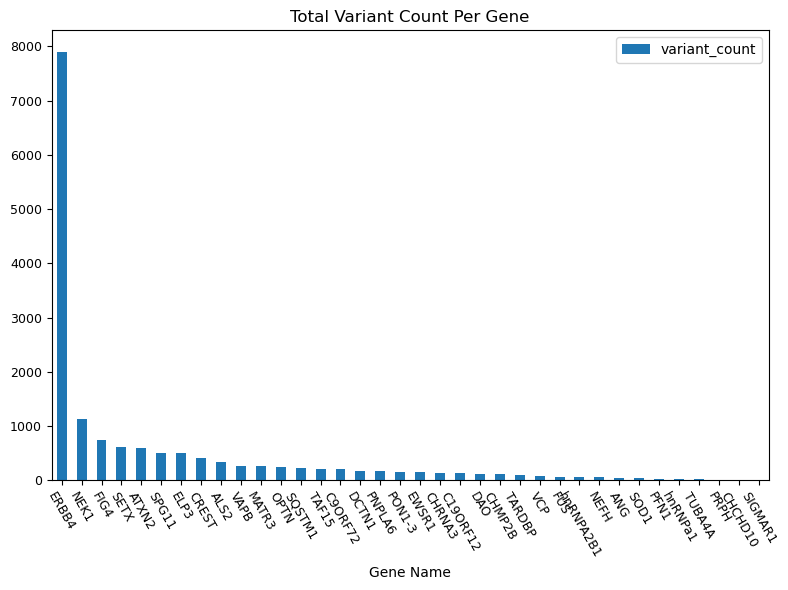

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'ATXN2']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,NA19238,2293
1,NA18868,2378
2,NA19206,2152
3,NA19248,2306
4,NA19143,2086


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(2307.1862745098038), 186.66196112367874)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

14

In [39]:
len(bottom_genomes)

20

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,NA19238,NA18868,NA19206,NA19248,NA19143,NA18508,NA19225,NA18489,NA18502,NA19152,...,NA19256,NA18523,NA19113,NA19235,NA19092,NA18909,NA18912,NA18908,NA18516,NA19207
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,60,21,22,5,19,18,42,40,17,23,...,7,4,37,15,35,45,38,35,37,11
ANG,5,12,9,5,7,13,12,5,5,6,...,6,7,5,8,5,3,5,9,13,6
ATXN2,170,158,160,25,16,18,159,177,164,39,...,6,21,13,14,172,174,21,152,162,153
C19ORF12,18,18,13,18,19,14,17,17,12,20,...,16,44,10,16,52,19,52,13,21,18
C9ORF72,27,21,20,32,26,6,39,16,23,21,...,13,15,24,5,23,29,2,29,10,21


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,NA18907,NA18499,NA18934,NA18520,NA18917,NA18501,NA18504,NA19239,NA19098,NA18877,NA18870,NA19114,NA19129,NA18516
gene,,,,,,,,,,,,,,
ERBB4,1445,1658,1459,1461,1307,1380,1346,1487,1530,1456,1563,1596,1537,1471
NEK1,203,317,190,290,318,280,211,182,208,279,231,227,324,320
FIG4,83,69,97,44,90,85,66,87,79,80,117,102,91,85
SETX,72,42,73,59,40,51,77,70,37,86,47,36,40,8
ATXN2,168,14,158,17,168,176,170,155,160,10,169,170,13,162


In [46]:
tgdf_bot_genomes.head()

,NA19143,NA18489,NA18502,NA19152,NA19189,NA19141,NA19236,NA18858,NA18924,NA18867,NA19116,NA19197,NA18510,NA19172,NA19153,NA19247,NA19175,NA18853,NA18517,NA19256
gene,,,,,,,,,,,,,,,,,,,,
ERBB4,1218,1057,951,1151,1093,1034,981,1382,1233,1142,1035,1157,1029,1173,1151,1084,1218,1006,1121,1136
NEK1,239,188,229,210,193,218,229,37,224,64,232,218,230,202,32,315,47,315,224,209
FIG4,62,77,57,82,93,95,98,64,84,73,88,103,83,76,105,65,43,94,72,105
SETX,26,49,44,85,26,42,66,47,68,68,39,49,46,29,26,45,28,40,60,28
ATXN2,16,177,164,39,156,170,167,15,30,152,173,12,166,25,150,12,22,20,162,6


## Plot stacked bar chart for top genes & top genomes

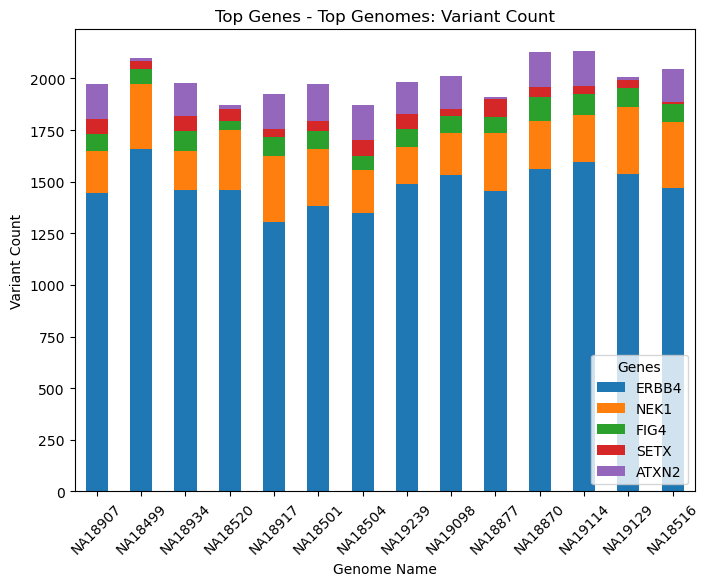

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

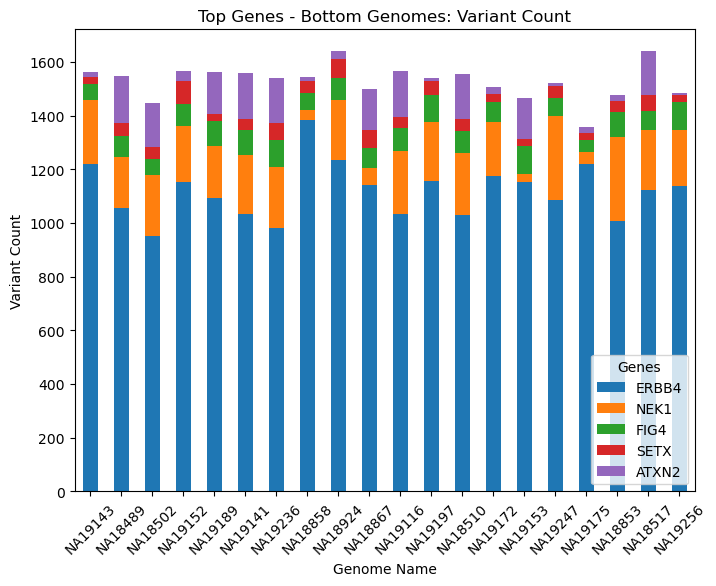

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()